In [32]:
####Importing required packages#######
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import skimage as sk
from tensorflow.python.framework import ops
import idx2numpy
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [33]:
#Importing data
tr_x='train-images-idx3-ubyte'
tr_y='train-labels-idx1-ubyte'
te_x='t10k-images-idx3-ubyte'
te_y='t10k-labels-idx1-ubyte'

In [34]:
#converting to numpy
xtrain=idx2numpy.convert_from_file(tr_x)
ytrain=idx2numpy.convert_from_file(tr_y)
xtest=idx2numpy.convert_from_file(te_x)
ytest=idx2numpy.convert_from_file(te_y)

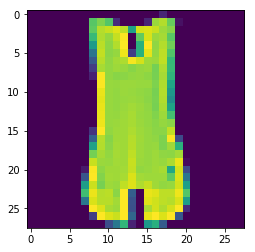

In [35]:
plt.imshow(xtrain[4])       #visualising few images 

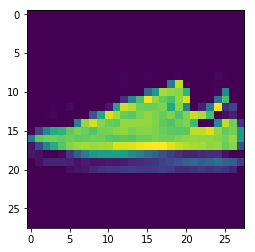

In [36]:
plt.imshow(xtrain[6])    #visualising few images

In [37]:
xtrain[78].shape   #Checking input size of image

(28, 28)

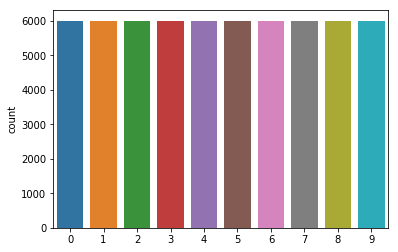

In [38]:
sns.countplot(ytrain)

In [39]:
#As we can see there is no class imbalance.

In [40]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=xtrain.shape))
print("Training set (labels) shape: {shape}".format(shape=ytrain.shape))

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)


In [41]:
# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=xtest.shape))
print("Test set (labels) shape: {shape}".format(shape=ytest.shape))

Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)


In [42]:
# Functions for various type of augmentation 
def Rotation(img):
    return sk.transform.rotate(img,45)

def Color_invert(img):
    return sk.util.invert(img)

def Flip(img):
    return np.flip(img)

def Random_Noise(img):
    return sk.util.random_noise(img)

def Contrast_Change(img):
    return sk.exposure.rescale_intensity(img, in_range=(20,100))

def Gamma_Correction(img,gamma=0.5):
    return sk.exposure.adjust_gamma(img,gamma)

def Sigmoid_Correction(img):
    return sk.exposure.adjust_sigmoid(img)


In [43]:
# Function takes image array and integer as input and return corresponding augmented image 

def Augmentation(img, n):
    if(n==0):
        return Rotation(img)
    elif(n==1):
        return Color_invert(img)
    elif(n==2):
            return Flip(img)
    elif(n==3):
            return Random_Noise(img)
    elif(n==4):
            return Contrast_Change(img)
    elif(n==5):
            return Gamma_Correction(img)
    elif(n==6):
            return Sigmoid_Correction(img)
    else:
        return img


In [44]:
Title = ["Rotation","Color_invert","Flip","Random_Noise","Contrast_Change","Gamma_Correction","Sigmoid_Correction"]

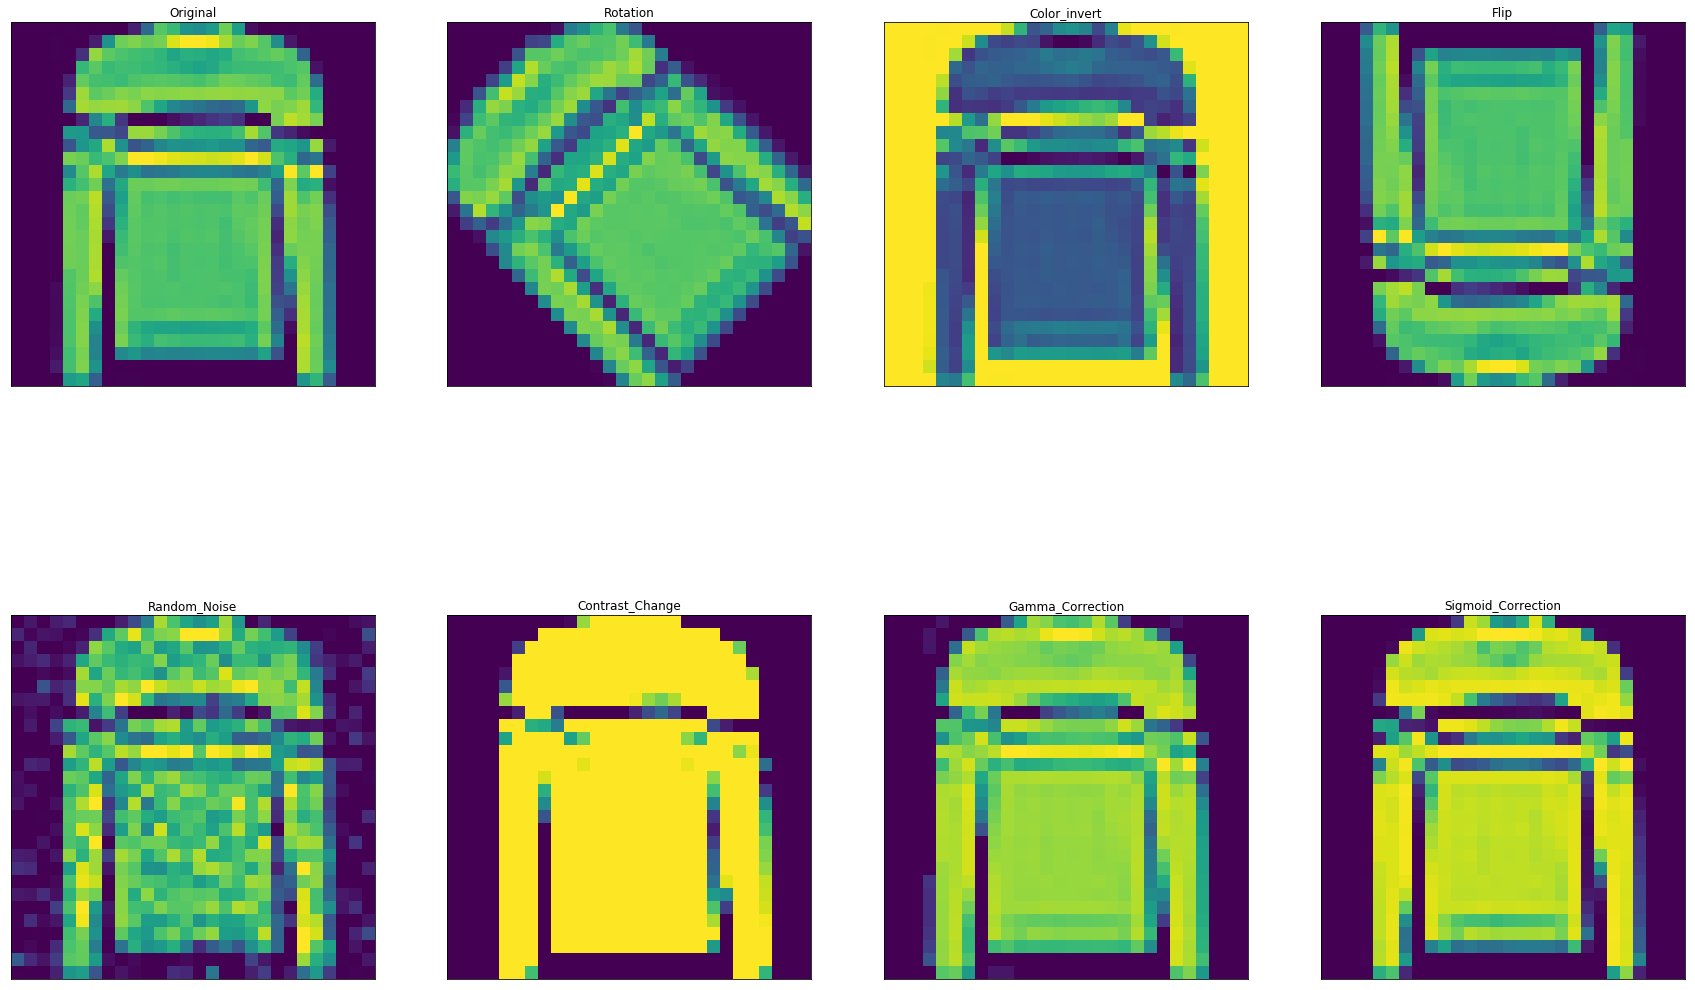

In [45]:
# Visualize augmented images 

plt.figure(figsize=(30,20))
plt.subplot(2,4,1)
plt.imshow(xtrain[5,:,:])
plt.xticks([])
plt.yticks([])
plt.title("Original")

for i in range(7):
    plt.subplot(2,4,i+2)
    imx = Augmentation(xtrain[5,:,:],i)
    plt.imshow(imx)
    plt.xticks([])
    plt.yticks([])
    plt.title(Title[i])

In [ ]:
############################################Part-2##################################################################

In [2]:
############Importing Fashion mnist data#############
((train_data, train_labels),
 (eval_data, eval_labels)) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#Building labeled dictionary
target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In [4]:
#Printing dimension of image
print(train_data.shape)
print(eval_data.shape)

(60000, 28, 28)
(10000, 28, 28)


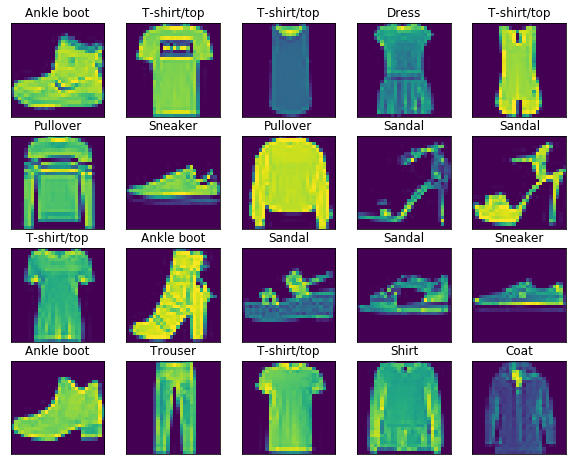

In [5]:
#Plotting few image samples
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_data[i] )
    plt.title( target_dict[(train_labels[i]) ])
    plt.xticks([])
    plt.yticks([])

In [6]:
#Normalizing dataset
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)

eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32)

In [7]:
#CNN Model function 
def cnn_model(features, labels, mode):
    #Reshapinng the input
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    
     # Convolutional Layer #1 and Pooling Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
          inputs=pool1,
          filters=64,
          kernel_size=[5, 5],
          padding="same",
          activation=tf.nn.relu)
    
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    #dropout_1 = tf.layers.dropout(inputs=pool2, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv3 = tf.layers.conv2d(
          inputs= pool2,
          filters=128,
          kernel_size=[5, 5],
        
          padding="same",
          activation=tf.nn.relu)
    
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    
    #dropout_2 = tf.layers.dropout(inputs=pool3, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
       
    flatten_1= tf.reshape(pool3, [-1, 3*3*128])
    
    dense = tf.layers.dense(inputs= flatten_1,units=1024,activation=tf.nn.relu)
    
    #dropout= tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    output_layer = tf.layers.dense(inputs= dense, units=10)
    predictions={
    "classes":tf.argmax(input=output_layer, axis=1),
    "probabilities":tf.nn.softmax(output_layer,name='softmax_tensor')
    }
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    loss= tf.losses.sparse_softmax_cross_entropy(labels=labels, logits= output_layer, scope='loss')
    
    if mode== tf.estimator.ModeKeys.TRAIN:
        optimizer= tf.train.AdamOptimizer(learning_rate=0.001)
        train_op= optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss,train_op=train_op )
    
    eval_metrics_op={ "accuracy":tf.metrics.accuracy(labels=labels,predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metrics_op)

In [8]:
fashion_classifier = tf.estimator.Estimator(model_fn = cnn_model)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpk01e_377', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f16916c2be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
# Training the model without dropout
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=32,
    num_epochs=10,
    shuffle=True)

fashion_classifier.train(input_fn=train_input_fn, steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpk01e_377/model.ckpt.
INFO:tensorflow:loss = 2.2924566, step = 1
INFO:tensorflow:global_step/sec: 15.8919
INFO:tensorflow:loss = 0.6098117, step = 101 (6.3

In [10]:
#Evaluation
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=10,
    shuffle=False)

eval_results = fashion_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-18T05:27:24Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpk01e_377/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-18-05:28:16
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8729, global_step = 1000, loss = 0.34276408
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpk01e_377/model.ckpt-1000
{'accuracy': 0.8729, 'loss': 0.34276408, 'global_step': 1000}


In [11]:
########################################CNN model With dropout #########################################################

In [12]:
def cnn_model_dropout(features, labels, mode):
    #Reshapinng the input
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    
     # Convolutional Layer #1 and Pooling Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
          inputs=pool1,
          filters=64,
          kernel_size=[5, 5],
          padding="same",
          activation=tf.nn.relu)
    
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    dropout_1 = tf.layers.dropout(inputs=pool2, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv3 = tf.layers.conv2d(
          inputs= dropout_1,
          filters=128,
          kernel_size=[5, 5],
        
          padding="same",
          activation=tf.nn.relu)
    
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    
    dropout_2 = tf.layers.dropout(inputs=pool3, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
       
    flatten_1= tf.reshape(dropout_2, [-1, 3*3*128])
    
    dense = tf.layers.dense(inputs= flatten_1,units=1024,activation=tf.nn.relu)
    
    dropout= tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    output_layer = tf.layers.dense(inputs= dropout, units=10)
    predictions={
    "classes":tf.argmax(input=output_layer, axis=1),
    "probabilities":tf.nn.softmax(output_layer,name='softmax_tensor')
    }
 
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    loss= tf.losses.sparse_softmax_cross_entropy(labels=labels, logits= output_layer, scope='loss')
    
    if mode== tf.estimator.ModeKeys.TRAIN:
        optimizer= tf.train.AdamOptimizer(learning_rate=0.001)
        train_op= optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss,train_op=train_op )
    
    eval_metrics_op={ "accuracy":tf.metrics.accuracy(labels=labels,predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metrics_op)

In [13]:
fashion_classifier1 = tf.estimator.Estimator(model_fn = cnn_model_dropout)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpz2b5dh_4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f167df02860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
# Train the model
train_input_fn1 = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=64,
    num_epochs=10,
    shuffle=True)

fashion_classifier1.train(input_fn=train_input_fn1, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpz2b5dh_4/model.ckpt.
INFO:tensorflow:loss = 2.316598, step = 1
INFO:tensorflow:global_step/sec: 8.46792
INFO:tensorflow:loss = 0.7694825, step = 101 (11.787 sec)
INFO:tensorflow:global_step/sec: 8.51203
INFO:tensorflow:loss = 0.33269858, step = 201 (11.748 sec)
INFO:tensorflow:global_step/sec: 8.03923
INFO:tensorflow:loss = 0.350466, step = 301 (12.440 sec)
INFO:tensorflow:global_step/sec: 8.01551
INFO:tensorflow:loss = 0.41650563, step = 401 (12.475 sec)
INFO:tensorflow:global_step/sec: 8.02074
INFO:tensorflow:loss = 0.3455519

In [15]:
eval_input_fn1 = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=10,
    shuffle=False)

eval_results1 = fashion_classifier1.evaluate(input_fn=eval_input_fn1)
print(eval_results1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-18T05:32:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpz2b5dh_4/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-18-05:33:26
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.88, global_step = 1000, loss = 0.33154628
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpz2b5dh_4/model.ckpt-1000
{'accuracy': 0.88, 'loss': 0.33154628, 'global_step': 1000}


In [16]:
######################################## Part 3 using batch normalization ###############################################

In [17]:
#CNN model with dropout and batch normalization
def cnn_model_dropout(features, labels, mode):
    #Reshapinng the input
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])
    
     # Convolutional Layer #1 and Pooling Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same")
    conv1=tf.layers.batch_normalization(conv1)
    conv1=tf.nn.relu(conv1)
    
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
          inputs=pool1,
          filters=64,
          kernel_size=[5, 5],
          padding="same")
    conv2=tf.layers.batch_normalization(conv2)
    conv2=tf.nn.relu(conv2)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
    
    dropout_1 = tf.layers.dropout(inputs=pool2, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
    
    # Convolutional Layer #2 and Pooling Layer #2
    conv3 = tf.layers.conv2d(
          inputs= dropout_1,
          filters=128,
          kernel_size=[5, 5],
        padding="same")
    conv3=tf.layers.batch_normalization(conv3)
    conv3=tf.nn.relu(conv3)
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    
    dropout_2 = tf.layers.dropout(inputs=pool3, rate=0.25,training=mode == tf.estimator.ModeKeys.TRAIN )
       
    flatten_1= tf.reshape(dropout_2, [-1, 3*3*128])
    
    dense = tf.layers.dense(inputs= flatten_1,units=1024,activation=tf.nn.relu)
    
    dropout= tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    output_layer = tf.layers.dense(inputs= dropout, units=10)
    predictions={
    "classes":tf.argmax(input=output_layer, axis=1),
    "probabilities":tf.nn.softmax(output_layer,name='softmax_tensor')
    }
    if mode==tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    loss= tf.losses.sparse_softmax_cross_entropy(labels=labels, logits= output_layer, scope='loss')
  
    if mode== tf.estimator.ModeKeys.TRAIN:
        optimizer= tf.train.AdamOptimizer(learning_rate=0.001)
        train_op= optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss,train_op=train_op )
    
    eval_metrics_op={ "accuracy":tf.metrics.accuracy(labels=labels,predictions=predictions["classes"])}
   
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metrics_op)

In [18]:
fashion_classifier2 = tf.estimator.Estimator(model_fn = cnn_model_dropout)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx_ofu6ma', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f16918e1be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
# Train the model
train_input_fn2 = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=64,
    num_epochs=10,
    shuffle=True)

fashion_classifier2.train(input_fn=train_input_fn2, steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.batch_normalization instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpx_ofu6ma/model.ckpt.
INFO:tensorflow:loss = 2.2969372, step = 1
INFO:tensorflow:global_step/sec: 7.65066
INFO:tensorflow:loss = 0.617063, step = 101 (13.071 sec)
INFO:tensorflow:global_step/sec: 7.92036
INFO:tensorflow:loss = 0.63689715, step = 201 (12.625 sec)
INFO:tensorflow:global_step/sec: 7.28203
INFO:tensorflow:loss = 0.4073316, step = 301 (13.732 sec)
INFO:tensorflow:global_step/sec: 7.09803
INFO:tensorflow:loss = 0.35251355, step = 401 (14.089 sec)
INFO:tensorflow:global_step/sec: 7.08557
INFO:tensorflow:loss = 0.3558758, step = 501 (14.113 sec)
INFO:tensorflow:global_step/sec: 7.03422
INFO:tensorflow:loss = 0.24763525, 

In [20]:
eval_input_fn2 = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=10,
    shuffle=False)

eval_results2 = fashion_classifier2.evaluate(input_fn=eval_input_fn2)
print(eval_results2)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-18T05:39:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx_ofu6ma/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-18-05:40:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.8879, global_step = 1000, loss = 0.30802605
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpx_ofu6ma/model.ckpt-1000
{'accuracy': 0.8879, 'loss': 0.30802605, 'global_step': 1000}


In [21]:
############################# Implementation of reduceLRonPlateau and Early stopping ##################################################

In [22]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = train_data[5000:], train_data[:5000] 
(y_train, y_valid) = train_labels[5000:], train_labels[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = eval_data.reshape(eval_data.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(eval_labels, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [23]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
#Early stopping using keras callback
from tensorflow.keras.callbacks import EarlyStopping

earlyStop=EarlyStopping(monitor="val_loss",verbose=1,mode='min',patience=3)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[earlyStop])

Train on 55000 samples, validate on 5000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 53s 970us/sample - loss: 0.6000 - acc: 0.7772 - val_loss: 0.3772 - val_acc: 0.8688
Epoch 2/10
55000/55000 [==============================] - 51s 926us/sample - loss: 0.4167 - acc: 0.8488 - val_loss: 0.3360 - val_acc: 0.8768
Epoch 3/10
55000/55000 [==============================] - 51s 924us/sample - loss: 0.3722 - acc: 0.8645 - val_loss: 0.2996 - val_acc: 0.8916
Epoch 4/10
55000/55000 [==============================] - 53s 965us/sample - loss: 0.3444 - acc: 0.8741 - val_loss: 0.2737 - val_acc: 0.8994
Epoch 5/10
55000/55000 [==============================] - 54s 983us/sample - loss: 0.3240 - acc: 0.8797 - val_loss: 0.2596 - val_acc: 0.9064
Epoch 6/10
55000/55000 [==============================] - 48s 870us/sample - loss: 0.3053 - acc: 0.8872 - val_loss: 0.2550 - val_acc: 0.9052
Epoch 7/10
55000/55000 [==============================] -

In [26]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [27]:
#ReduceLRonPlateau using keras callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[reduce_lr])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 53s 964us/sample - loss: 0.2616 - acc: 0.9043 - val_loss: 0.2194 - val_acc: 0.9216
Epoch 2/10
55000/55000 [==============================] - 51s 936us/sample - loss: 0.2572 - acc: 0.9038 - val_loss: 0.2508 - val_acc: 0.9062
Epoch 3/10
55000/55000 [==============================] - 50s 914us/sample - loss: 0.2502 - acc: 0.9071 - val_loss: 0.2188 - val_acc: 0.9178
Epoch 4/10
55000/55000 [==============================] - 51s 924us/sample - loss: 0.2439 - acc: 0.9101 - val_loss: 0.2104 - val_acc: 0.9264
Epoch 5/10
55000/55000 [==============================] - 50s 902us/sample - loss: 0.2407 - acc: 0.9107 - val_loss: 0.2151 - val_acc: 0.9232
Epoch 6/10
55000/55000 [==============================] - 50s 900us/sample - loss: 0.2326 - acc: 0.9132 - val_loss: 0.2218 - val_acc: 0.9206
Epoch 7/10
55000/55000 [==============================] - 50s 906us/sample - loss: 0.2319 - acc: 0.9129 -

In [28]:
score = model.evaluate(x_valid, y_valid, verbose=0)

In [29]:
#print loss and accuracy on validation data
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.20557098866775633
Validation accuracy: 0.9252


In [30]:
score1 = model.evaluate(x_test, y_test, verbose=0)

In [31]:
#print loss and accuracy on test data
print('Test data loss:', score1[0])
print('Test data accuracy:', score1[1])

Test data loss: 0.2286509699821472
Test data accuracy: 0.9177
